# [Monte Carlo Simulation](http://zwmiller.com/projects/monte_carlo_part2.html)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

# Problem 1
- Given 
    + Row = today meal
    + Column = tomorrow meal given today meal

|      -      	| **Beef** 	| **Chicken** 	| **Veg** 	|
|:-----------:	|:--------:	|:-----------:	|:-------:	|
|   **Beef**  	|    25%   	|     50%     	|   25%   	|
| **Chicken** 	|    75%   	|     20%     	|    5%   	|
|   **Veg**   	|    50%   	|     50%     	|    0%   	|

- Calculate the chance to eat beef today

In [2]:
dinner_matrix = \
    [[.25, .5, .25],
     [.75, .2, .05],
     [.50, .5, 0.0]]

In [64]:
from enum import IntEnum

class Meal(IntEnum):
    BEEF = 0
    CHICKEN = 1
    VEG = 2

starting_meal = np.random.choice(Meal)
print(starting_meal)

2


In [61]:
def simulate(starting_meal: int, N: int=100000):
    meal_counter: dict = {Meal.BEEF: 0, Meal.CHICKEN: 0, Meal.VEG: 0}
    beef_percentage_over_time: list = []    # For plotting

    # Simulate
    meal = starting_meal
    meal_counter[meal] += 1
    for i in range(N):
        meal = np.random.choice(
            Meal, p=dinner_matrix[meal])
        meal_counter[meal] += 1
        beef_percentage_over_time.append(meal_counter[Meal.BEEF] / (i+1))
    
    return beef_percentage_over_time

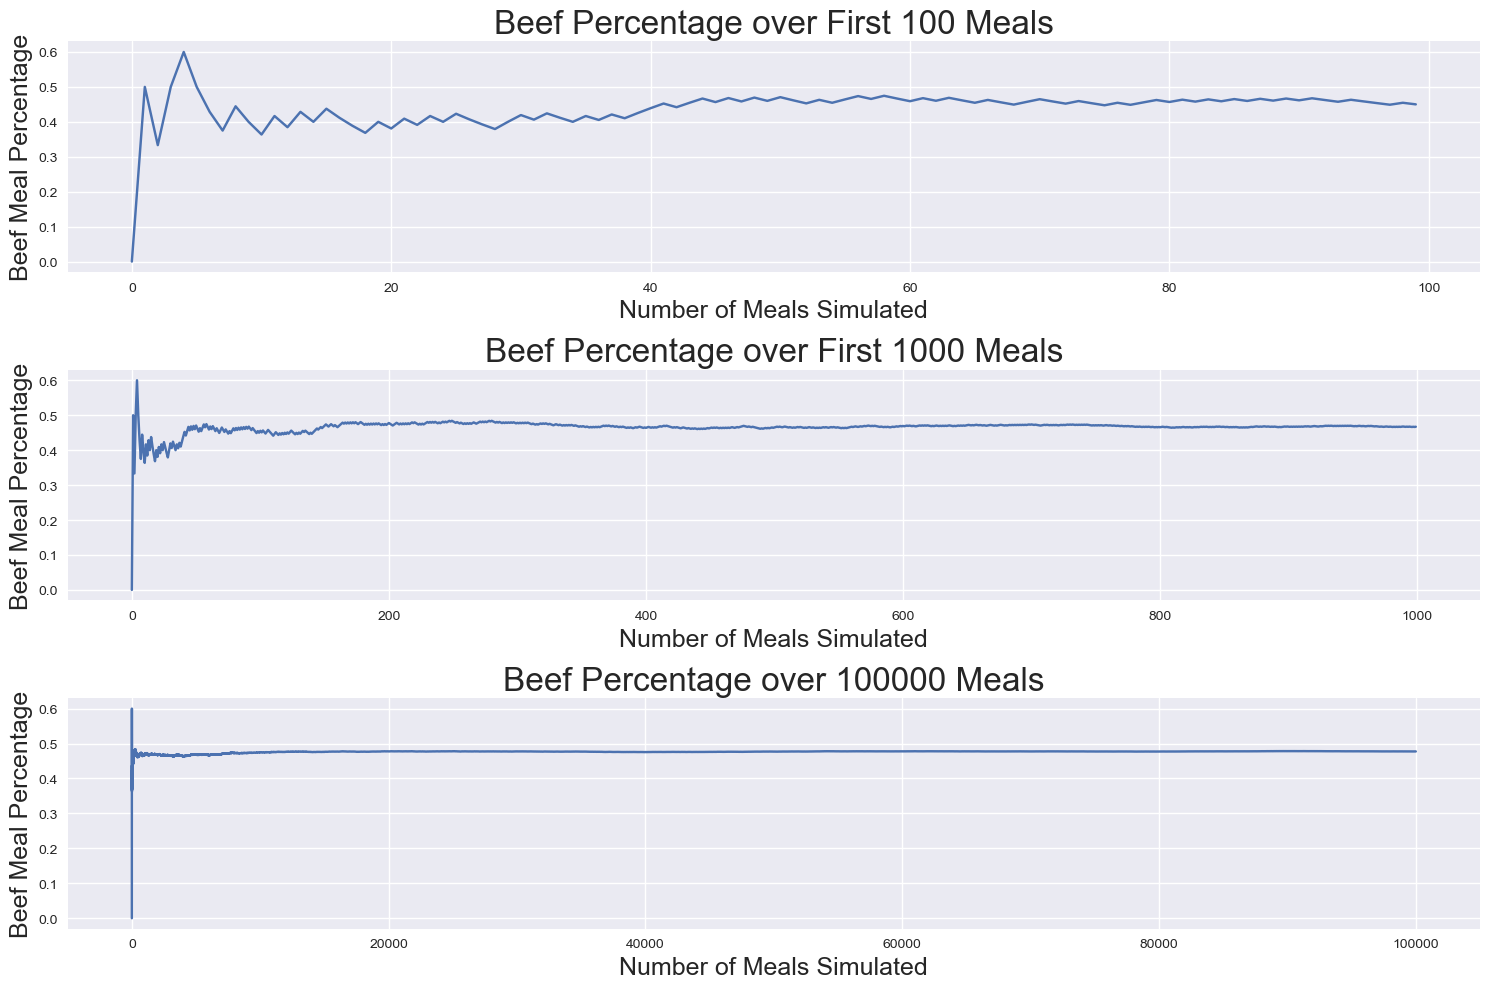

In [72]:
beef_percentage_over_time = simulate(starting_meal, N=100000)

#### Plot ####
fig, ax = plt.subplots(
    nrows=3, ncols=1,
    dpi=100,
    figsize=(15,10))

# Fig 0: N=100
ax[0].plot(
    range(100), beef_percentage_over_time[:100])
ax[0].set_title("Beef Percentage over First 100 Meals", fontsize=24);
ax[0].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[0].set_ylabel("Beef Meal Percentage", fontsize=18)

# Fig 1: N=1000
ax[1].plot(
    range(1000), beef_percentage_over_time[:1000])
ax[1].set_title("Beef Percentage over First 1000 Meals", fontsize=24);
ax[1].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[1].set_ylabel("Beef Meal Percentage", fontsize=18)

# Fig 2: N=1000
ax[2].plot(
    range(100000), beef_percentage_over_time);
ax[2].set_title("Beef Percentage over 100000 Meals", fontsize=24);
ax[2].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[2].set_ylabel("Beef Meal Percentage", fontsize=18)

plt.tight_layout()

# Problem 2: Random Walk

In [1]:
def convert_degrees_to_rads(degrees):
    """    
    Input: degrees (0-360) int
    Output: float, angle in radians
    """
    return float(((2*np.pi)/360)*degrees)


def take_step(position, step_size):
    """
    Takes a random step
    Input: (x, y) position in a list
    Output: (x, y) updated, in a list
    """
    angle_degrees = np.random.randint(0,360)
    angle_radians = convert_degrees_to_rads(angle_degrees)

    new_x = position[0] + step_size*np.cos(angle_radians)
    new_y = position[1] + step_size*np.sin(angle_radians)
    return [new_x, new_y]